In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Unsupervised Learning Techniques
## Clusterings

In [2]:
# firstly, generating data: some blobs
from sklearn.datasets import make_blobs

blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, 
                 cluster_std=blob_std, random_state=7)

In [3]:
# plot the graph
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

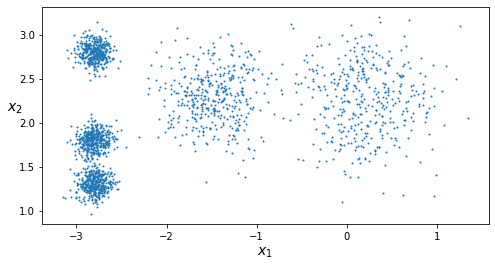

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [5]:
# K-Means clustering
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [6]:
kmeans.labels_ # equal to y_pred

array([4, 2, 1, ..., 0, 1, 2])

In [7]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [8]:
# helper functions
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

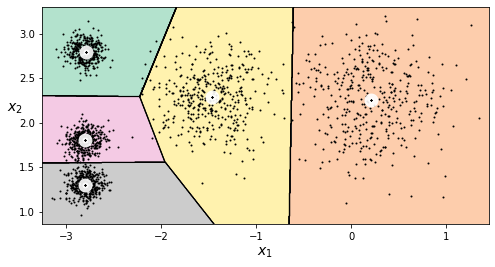

In [9]:
# visulize the decision boundries 
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [10]:
# make out a few instances to test on
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [11]:
# kmeans predict the class it belongs
kmeans.predict(X_new)

array([1, 1, 0, 0])

In [12]:
# gives the distance from each instance to every centroid
kmeans.transform(X_new)

array([[2.9042344 , 0.32995317, 2.81093633, 1.49439034, 2.88633901],
       [5.84739223, 2.80290755, 5.80730058, 4.4759332 , 5.84236351],
       [0.29040966, 3.29399768, 1.21475352, 1.69136631, 1.71086031],
       [0.36159148, 3.21806371, 0.72581411, 1.54808703, 1.21567622]])

Notice this is a k-dimensional dataset: a tranformation!
- can be very efficient nonlinear dimensionality reduction technique

## Mini-batch K-Means

In [13]:
# application of mini-batch k-means
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, batch_size = 2048) # might cause memory leakage with MKL
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=2048, n_clusters=5)

## Finding Optimal K Number

### By Check Inertia

In [14]:
# notice that this block of code have conflict with intel patch_sklearn
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

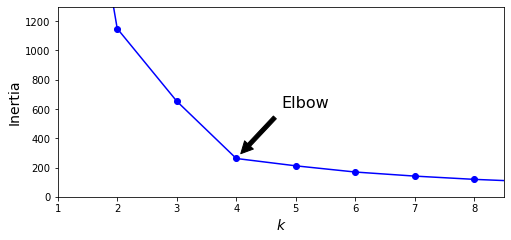

In [15]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

### By Checking Sklhouette Score

In [16]:
# simple applicaion of Sklhouette Score
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [17]:
# generate Sklhouette scores
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

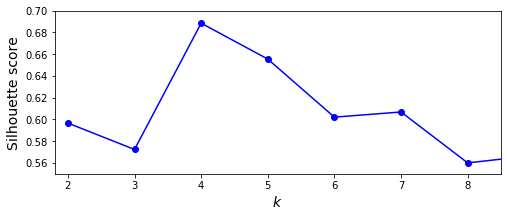

In [18]:
# generate graph
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

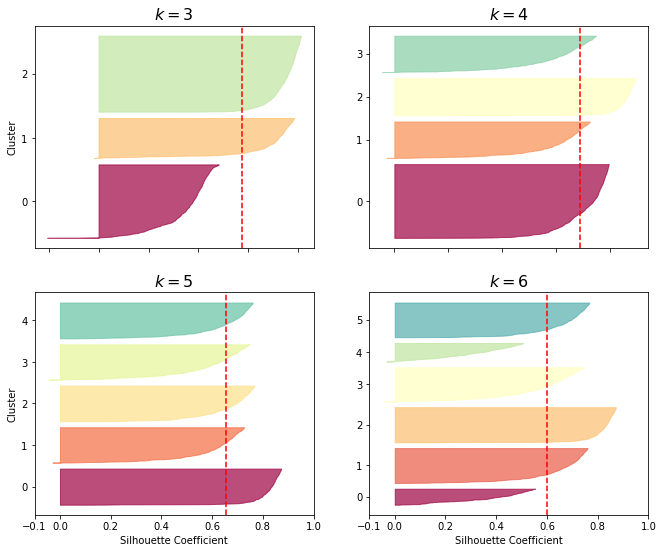

In [19]:
# plot the Sklhoueete Diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## Application of Clustering with K-Means

### Image Segmentation

In [20]:
# An application of Color Segmentation with K-Means
from matplotlib.image import imread # or from imageio
image = imread("ladybug.png")
image.shape
# three dimensions: first height, second width, third color channels

(533, 800, 3)

In [21]:
# cluster the colors
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # replace each pixel with their cluster center, a np grammar
segmented_img = segmented_img.reshape(image.shape)

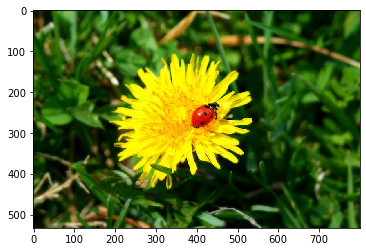

In [22]:
# original graph
plt.imshow(image)

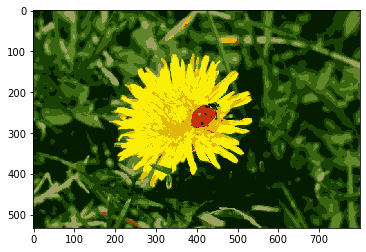

In [23]:
# 8 colors
plt.imshow(segmented_img)

### Using Clustering for Preprocessing
Use a MNIST-like dataset to show how clustering can improve supervised ml performance

In [24]:
# generate dataset
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

# train on a Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# evaluate the model
log_reg.score(X_test, y_test)

0.96

In [25]:
# plug the clustering into the preprocessing step
from sklearn.pipeline import Pipeline

# set up the pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(max_iter=50000)),
])

# fit on the pipeline
pipeline.fit(X_train, y_train)

# evaluate this pipeline
pipeline.score(X_test, y_test)

0.96

In [26]:
%%time
# this might lead to a long time 
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   2.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.9s
[CV] END ...............................kmeans__n_clusters=5; total time=   2.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   2.5s
[CV] END ...............................kmeans_

C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=7; total time=   4.5s
[CV] END ...............................kmeans__n_clusters=7; total time=   3.9s
[CV] END ...............................kmeans__n_clusters=8; total time=   2.5s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=8; total time=   4.5s
[CV] END ...............................kmeans__n_clusters=8; total time=   3.0s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=9; total time=   4.5s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=9; total time=   4.6s
[CV] END ...............................kmeans__n_clusters=9; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=10; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=10; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=10; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=11; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=11; total time=   2.8s
[CV] END ..............................kmeans__n_clusters=11; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=12; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=12; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=12; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=13; total time=   2.5s
[CV] END ...................

C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=16; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=16; total time=   5.0s
[CV] END ..............................kmeans__n_clusters=17; total time=   2.4s
[CV] END ..............................kmeans__n_clusters=17; total time=   4.2s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=17; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=18; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=18; total time=   4.9s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=18; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=19; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=19; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=19; total time=   4.4s
[CV] END ..............................kmeans__n_clusters=20; total time=   2.1s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=20; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=20; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=21; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=21; total time=   3.8s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=21; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=22; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=22; total time=   5.3s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=22; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=23; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=23; total time=   4.8s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=23; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=24; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=24; total time=   3.1s


C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=24; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=25; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=25; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=25; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=26; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=26; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=26; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=27; total time=   2.8s
[CV] END ..............................kmeans__n_clusters=27; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=27; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=28; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=28; total time=   3.2s
[CV] END ...................

C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=29; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=29; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=30; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=30; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=30; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=31; total time=   1.7s
[CV] END ..............................kmeans__n_clusters=31; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=31; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=32; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=32; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=32; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=33; total time=   1.6s
[CV] END ...................

C:\ProgramData\Anaconda3\envs\iaat\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=60; total time=   6.0s
[CV] END ..............................kmeans__n_clusters=60; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=61; total time=   1.7s
[CV] END ..............................kmeans__n_clusters=61; total time=   1.4s
[CV] END ..............................kmeans__n_clusters=61; total time=   2.6s
[CV] END ..............................kmeans__n_clusters=62; total time=   1.3s
[CV] END ..............................kmeans__n_clusters=62; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=62; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=63; total time=   1.5s
[CV] END ..............................kmeans__n_clusters=63; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=63; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=64; total time=   1.3s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=94; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=94; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=95; total time=   1.3s
[CV] END ..............................kmeans__n_clusters=95; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=95; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=96; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=96; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=96; total time=   1.5s
[CV] END ..............................kmeans__n_clusters=97; total time=   1.4s
[CV] END ..............................kmeans__n_clusters=97; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=97; total time=   1.5s
[CV] END ..............................kmeans__n_clusters=98; total time=   1.9s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=50000))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [27]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [28]:
grid_clf.score(X_test, y_test)

0.9666666666666667

## DBSCAN

In [26]:
# train DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [27]:
# check the labels (cluster labels)
dbscan.labels_[:10]

array([ 0,  1,  2,  2,  2,  2,  0, -1,  1,  1], dtype=int64)

In [28]:
# see the core samples number
len(dbscan.core_sample_indices_)

831

In [29]:
# see the core samples
dbscan.components_[:3]

array([[ 0.75139319, -0.39796211],
       [-0.94641116,  0.07216172],
       [ 1.86481359, -0.01504497]])

In [30]:
# see the number of clusters defined
np.unique(dbscan.labels_) # -1 means abnormals

array([-1,  0,  1,  2], dtype=int64)

In [31]:
# define a helper function to draw DBSCAN graphs
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

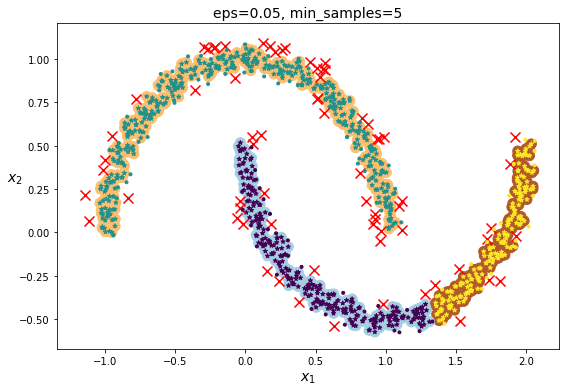

In [32]:
plt.figure(figsize=(9, 6))
plot_dbscan(dbscan, X, size=100)
plt.show()

In [33]:
# a DBSCAN with larger epsilon value
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

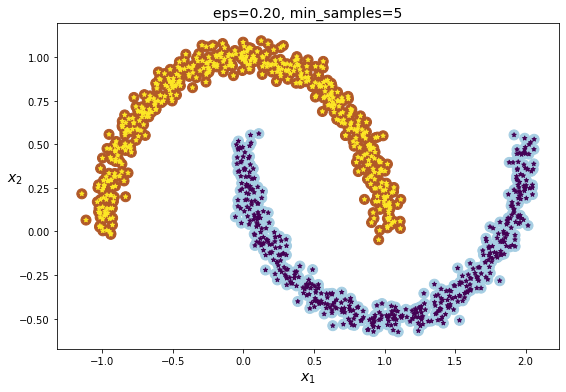

In [34]:
plt.figure(figsize=(9, 6))
plot_dbscan(dbscan2, X, size=100)
plt.show()

In [35]:
# in order to predict new instances' class, use the KNN method
dbscan = dbscan2 # use this better classification later
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_]) # the only two classes from DBSCAN of core instances

# create new data and predict
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [36]:
# the probability function
knn.predict_proba(X_new)

array([[0.12, 0.88],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

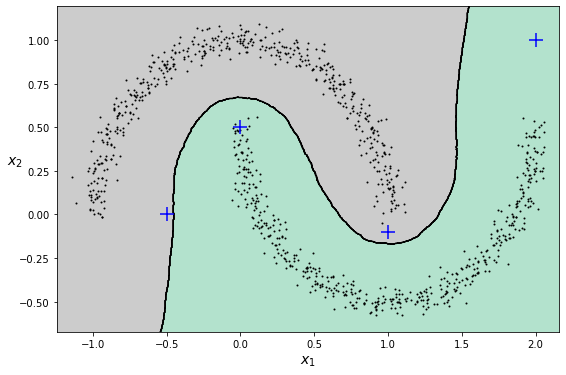

In [37]:
# plot the decision boundary of KNN based on DBSCAN result
plt.figure(figsize=(9, 6))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [38]:
# use 0.2 as boundary to decide the abnormaly
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

In [39]:
# distance toward clusterings
y_dist

array([[0.38865174],
       [0.01764326],
       [0.0663501 ],
       [0.45431759]])

## Spectral Clustering

In [40]:
# an application of of spectral clustering
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2, gamma=100, random_state=42)

sc.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

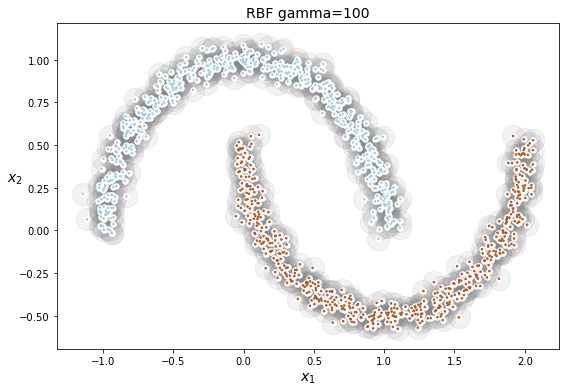

In [42]:
# visualize the graph

# helper function 
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)
    
# plot this function
plt.figure(figsize=(9, 6))
plot_spectral_clustering(sc, X, size=500, alpha=0.1)
plt.show()

## Agglomerative Clustering

In [44]:
# application on aggolomerative clustering
from sklearn.cluster import AgglomerativeClustering

# generate data
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
# train
agg = AgglomerativeClustering(linkage="complete").fit(X)

# helper function for see the learned parameters
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

# Gaussian Mixtures

In [45]:
# prepare the data
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

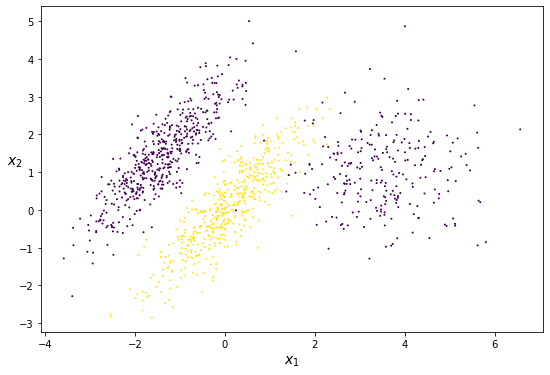

In [73]:
plt.figure(figsize=(9, 6))
plot_clusters(X, y)
plt.show()

In [59]:
# application of Gaussian Mixtures
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [60]:
# did the algorithm converge?
gm.converged_

True

In [61]:
# how many iterations did it take?
gm.n_iter_

4

In [62]:
# the weights
gm.weights_

array([0.39040749, 0.20954915, 0.40004337])

In [63]:
# the locations
gm.means_

array([[ 0.0516183 ,  0.07550754],
       [ 3.40011393,  1.05931676],
       [-1.40765148,  1.42718339]])

In [64]:
# the covariances
gm.covariances_

array([[[ 0.68856426,  0.79633822],
        [ 0.79633822,  1.21252023]],

       [[ 1.14631283, -0.03285453],
        [-0.03285453,  0.95505142]],

       [[ 0.63477114,  0.72969538],
        [ 0.72969538,  1.16085164]]])

In [65]:
# how to see the result by hard category?
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [66]:
# by soft probabilities?
gm.predict_proba(X)

array([[9.76903627e-01, 2.30956994e-02, 6.73632768e-07],
       [9.83009622e-01, 1.63176388e-02, 6.72738827e-04],
       [7.59268139e-05, 1.96800317e-06, 9.99922105e-01],
       ...,
       [4.38851876e-07, 9.99999561e-01, 2.09167854e-26],
       [5.40181989e-16, 1.00000000e+00, 1.41536116e-41],
       [2.38611270e-15, 1.00000000e+00, 7.72772760e-41]])

In [67]:
# generate new data samples
X_new, y_new = gm.sample(6)

In [68]:
# see densities at each point
gm.score_samples(X)

array([-2.60806011, -3.57076496, -3.3306168 , ..., -3.51374548,
       -4.39785401, -3.80701199])

In [69]:
# helper function
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

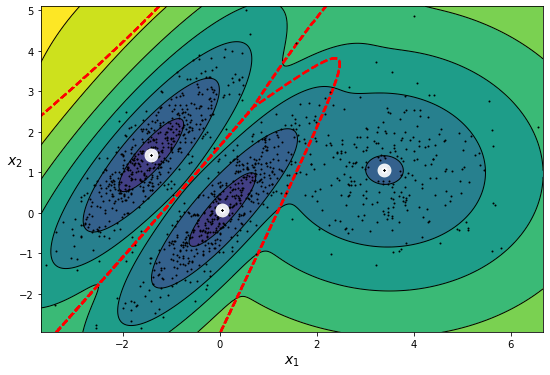

In [74]:
# visualize
plt.figure(figsize=(9, 6))

plot_gaussian_mixture(gm, X)

plt.show()

### Anomaly Detection

In [72]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
anomalies

array([[-0.11118987,  1.61334992],
       [ 0.62362922,  4.41540435],
       [ 1.49808977, -0.15251688],
       [ 0.74219223, -1.00445177],
       [-2.53940854, -2.76549965],
       [-1.62447969, -0.45770022],
       [-1.74680316, -0.78385111],
       [-3.58308316, -1.28249917],
       [ 0.53903026,  5.00244257],
       [-0.51480414, -2.16270124],
       [-1.81015204, -0.58926015],
       [-1.79651788, -0.97031471],
       [-2.11225785, -2.09712817],
       [-3.39408574, -2.28378778],
       [ 1.58082729,  4.20122873],
       [-2.48037945, -1.18651064],
       [-2.93972237, -1.41660564],
       [-1.62285961, -2.84860478],
       [-0.25954463, -1.7743691 ],
       [ 0.46018217,  2.78323717],
       [-2.06317379,  2.2670332 ],
       [ 0.13982849,  2.08023553],
       [-2.54004484, -2.8290338 ],
       [-1.93037427, -1.19447352],
       [-0.27124433, -1.86750177],
       [-1.15568262, -2.57480367],
       [-1.93315582,  2.49030105],
       [ 4.93207567, -0.42157602],
       [ 5.80546094,

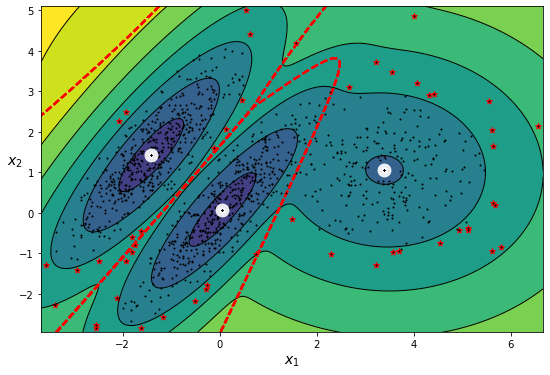

In [75]:
# visualize
plt.figure(figsize=(9, 6))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

### Decide the Number of Clusters

In [77]:
# check the BIC score
gm.bic(X)

8189.718049665739

In [78]:
# check the AIC score
gm.aic(X)

8102.492769550701

C:\Users\keyuu\anaconda3\envs\iaat\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\keyuu\anaconda3\envs\iaat\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\keyuu\anaconda3\envs\iaat\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\keyuu\anaconda3\envs\iaat\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is k

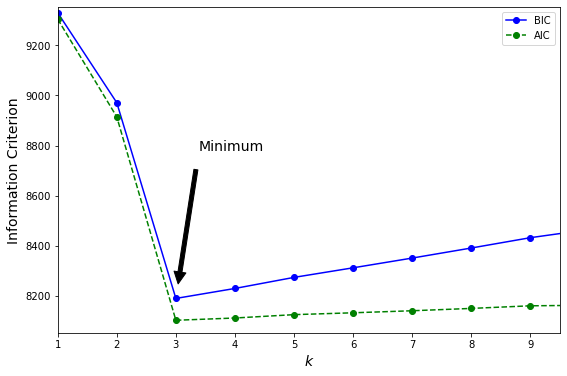

In [86]:
# Plot the BIC / AIC against number of clusters

# Models with different number of k
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

# values
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()

plt.show()

## Bayesian Gaussian Mixture Models

In [87]:
# application to directly use Bayesian Gaussian Mixture to avoid choosing cluster numbers
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4, 0.2, 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ])